                                       Id  Engine Size(L)  Cylinders  \
Id                               1.000000       -0.005843  -0.003336   
Engine Size(L)                  -0.005843        1.000000   0.742103   
Cylinders                       -0.003336        0.742103   1.000000   
Fuel Consumption City (L/100km)  0.000563        0.115825   0.121472   
Fuel Consumption Hwy (L/100km)  -0.001014        0.106683   0.107448   
Fuel Consumption Comb (L/100km)  0.000344        0.141019   0.146481   
CO2 Emissions(g/km)             -0.000694        0.489923   0.500424   

                                 Fuel Consumption City (L/100km)  \
Id                                                      0.000563   
Engine Size(L)                                          0.115825   
Cylinders                                               0.121472   
Fuel Consumption City (L/100km)                         1.000000   
Fuel Consumption Hwy (L/100km)                          0.065535   
Fuel Consumptio

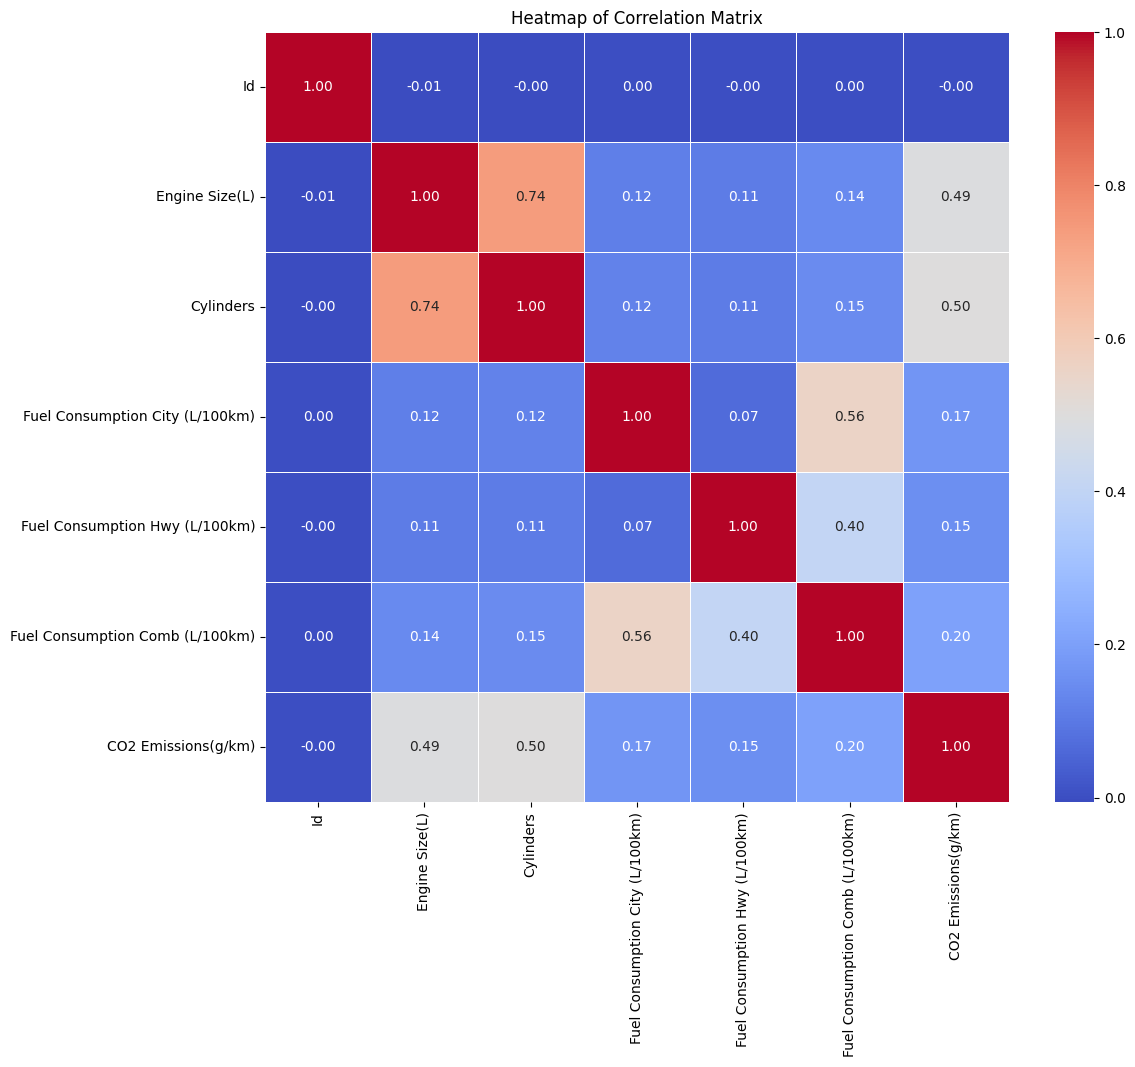

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_train.csv')

columns_to_plot = [
    'Id', 'Make', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 
    'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100km)', 
    'Fuel Consumption Hwy (L/100km)', 'Fuel Consumption Comb (L/100km)', 'CO2 Emissions(g/km)'
]

numeric_columns = df[columns_to_plot].select_dtypes(include='number')

correlation_matrix = numeric_columns.corr()
print(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()


In [3]:
pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for matplotlib!=3.6.1,>=3.3 from https://files.pythonhosted.org/packages/2e/51/c77a14869b7eb9d6fb440e811b754fc3950d6868c38ace57d0632b674415/matplotlib-3.8.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/8e/ae/a6353db548bff1a592b85ae6bb80275f0a51dc25a0410d059e5b33183e36/contourpy-1.2.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/ea/1e/a944a93c33e5cf495b0eb0c5e7e81f707c6b4d0dc5

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
from numpy import percentile
from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [1]:
df = pd.read_csv('cleaned_train.csv')

NameError: name 'pd' is not defined

In [5]:
df["Fuel Type"] = np.where(df["Fuel Type"]=="Z", "Premium Gasoline", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="X", "Regular Gasoline", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="D", "Diesel", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="E", "Ethanol(E85)", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="N", "Natural Gas", df["Fuel Type"])

Make
------------  -----
FOLD          18081
CHEVO         16615
BMV           14932
TOYOTI         9562
NIRRAN         7287
JIPU           7242
DOGE           6947
KIO            6443
GONDA          6035
RYUNDAI        5925
FOLKSWA        5382
LECUS          5171
MATSUDA        5052
CADILUXE       4517
BARUSU         3982
TOLVO          3595
MITSU          2701
LAND CRAWLER   2455
ASURA          2040
FIAR           2012
LAMBOGI        1165
------------  -----


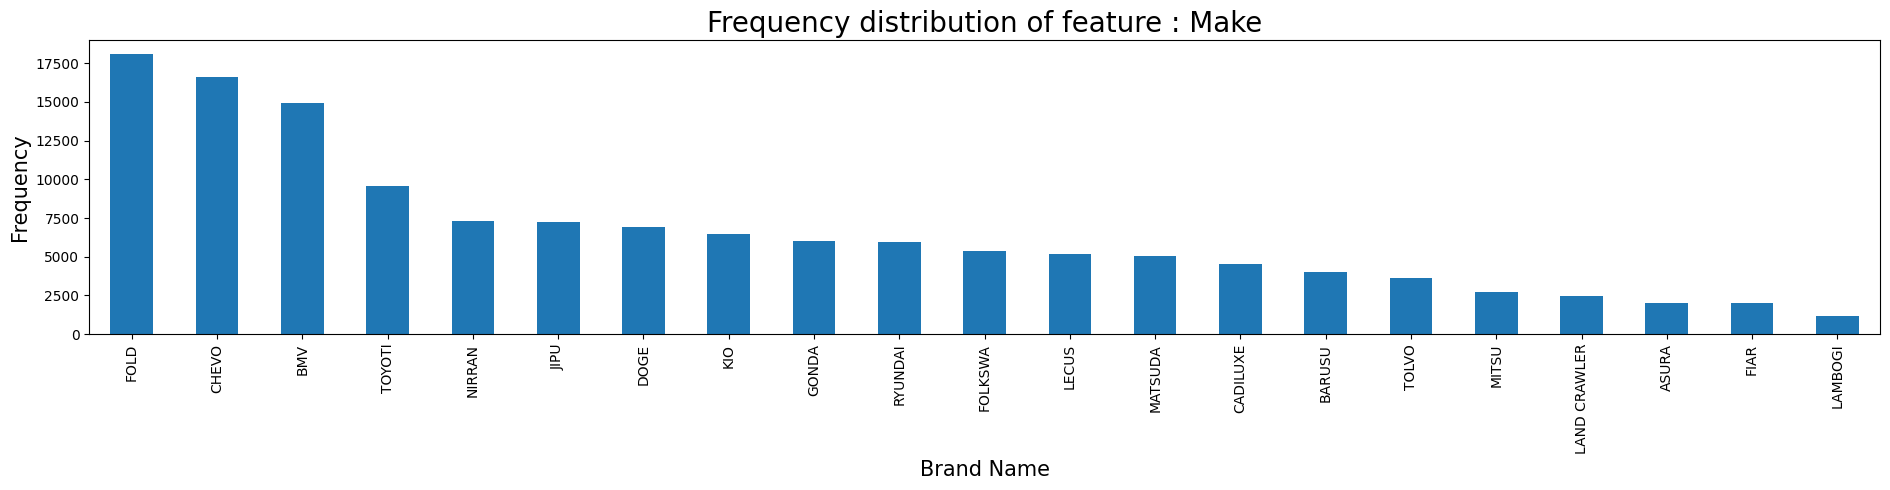

In [6]:
from tabulate import tabulate
print("Make")
print(tabulate(pd.DataFrame(df['Make'].value_counts())))

plt.figure(figsize=(19,5))
df.groupby("Make")["Make"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : Make", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Brand Name", fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Vehicle Class
------------------------  -----
SUV - SMALL               27799
COMPACT                   21981
MID-SIZE                  20703
SUV - STANDARD            12250
FULL-SIZE                  9998
PICKUP TRUCK - STANDARD    9613
SUBCOMPACT                 9148
STATION WAGON - SMALL      5956
TWO-SEATER                 4044
PICKUP TRUCK - SMALL       3214
MINICOMPACT                1734
MINIVAN                    1676
SPECIAL PURPOSE VEHICLE    1450
VAN - PASSENGER            1225
STATION WAGON - MID-SIZE    863
VAN - CARGO                 355
------------------------  -----


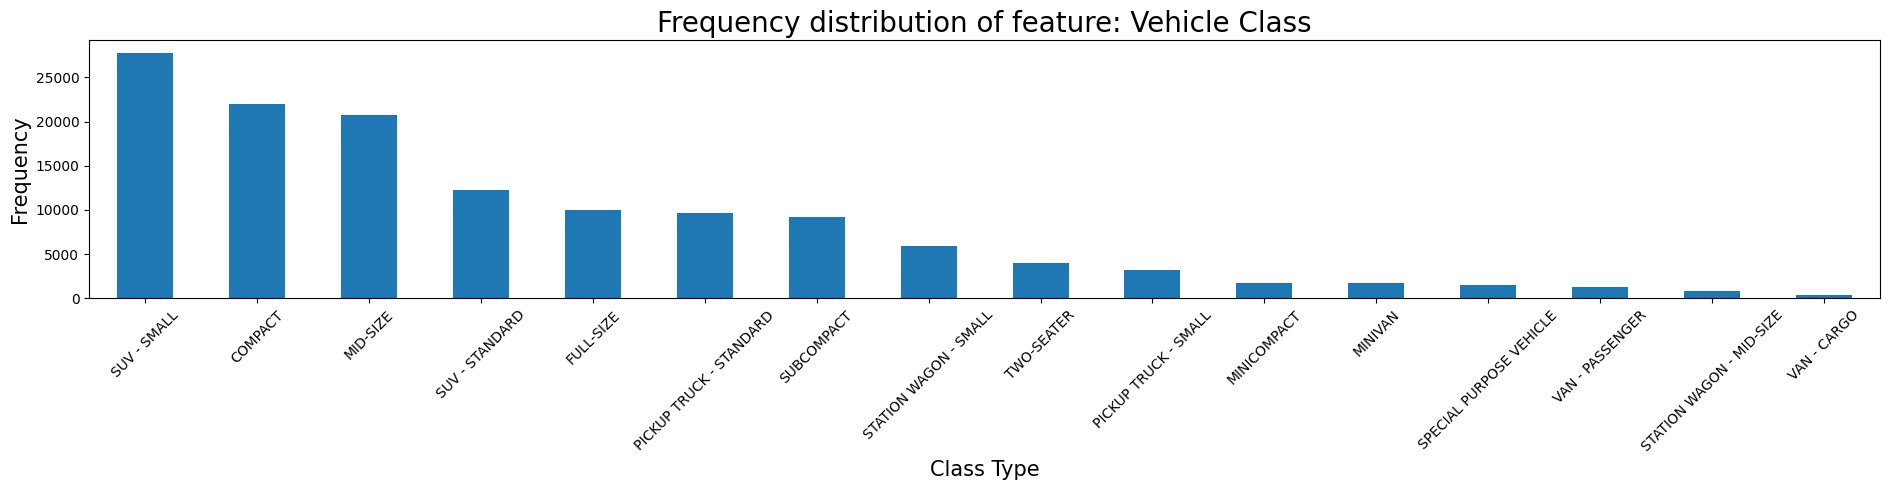

In [9]:
print("Vehicle Class")
print(tabulate(pd.DataFrame(df["Vehicle Class"].value_counts())))
# df.groupby("Make")["Make"].count().sort_values(ascending=False).plot(kind="bar")
plt.figure(figsize=(19, 5))
df.groupby('Vehicle Class')["Vehicle Class"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature: Vehicle Class", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Class Type", fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
data_make=df['Make'].unique()
print(data_make)

['FOLD' 'CHEVO' 'BMV' 'KIO' 'BARUSU' 'LECUS' 'GONDA' 'LAND CRAWLER'
 'FOLKSWA' 'TOYOTI' 'JIPU' 'TOLVO' 'ASURA' 'NIRRAN' 'FIAR' 'DOGE'
 'CADILUXE' 'MATSUDA' 'MITSU' 'RYUNDAI' 'LAMBOGI']


In [13]:
data_class=df['Vehicle Class'].unique()
print(data_class)

['PICKUP TRUCK - STANDARD' 'SUBCOMPACT' 'SUV - SMALL' 'MINICOMPACT'
 'COMPACT' 'FULL-SIZE' 'SUV - STANDARD' 'MINIVAN' 'STATION WAGON - SMALL'
 nan 'PICKUP TRUCK - SMALL' 'TWO-SEATER' 'STATION WAGON - MID-SIZE'
 'MID-SIZE' 'SPECIAL PURPOSE VEHICLE' 'VAN - PASSENGER' 'VAN - CARGO']
